# PISA 2012 Exploration 
## by Maryna Misyura

## Preliminary Wrangling

> This document explores a dataset containing PISA 2012 survey of students' skills and knowledge as they
approach the end of compulsory education. It is not a conventional school test.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.<br>
Dataset is too big. I'll have to filter data and choose only some columns to analize.<br>
First choice for filter column is county

In [3]:
# load in the dataset into a pandas dataframe, print statistics
pisa = pd.read_csv(r'C:\Users\Marin\UGitCourse\csv\pisa2012.csv', encoding = "latin-1",# index_col=0,
                    usecols=['CNT','PV1MATH','PV1READ', 'PV1SCIE','ST04Q01','ST01Q01','SCHOOLID','IMMIG','LANGN', 'ESCS','ST29Q04','ST57Q01','INTMAT', 'OUTHOURS','LMINS', 'MMINS','SMINS'])
#There are 635 columns in the dataset. I'll have to choose just some of them for the analysis

In [4]:
#rename some columns 
pisa = pisa.rename(columns={'CNT': 'Country', 
                            'PV1MATH': 'Math_score', 
                            'PV1READ': 'Reading_score', 
                            'PV1SCIE': 'Science_score', 
                            'ST04Q01': 'Gender', 
                            'ST01Q01': 'Grade', 
                            'SCHOOLID': 'School_ID',
                            'IMMIG': 'Immigration_status',
                            'LANGN': 'Language_at_home',
                            'ESCS' : 'Socio_economic_status',
                            'ST29Q04': 'Enjoy_math',
                            'ST57Q01':'Homework_hours',
                            'INTMAT':'Math_interest',
                           'OUTHOURS':'Out_of_school_study_hours',
                           'LMINS':'In_school_study_min',
                           'MMINS':'Math_in_school_min',
                           'SMINS':'Science_in_school_min'})

In [40]:
#Temp
pisa0 = pd.read_csv(r'C:\Users\Marin\UGitCourse\csv\pisa2012.csv', encoding = "ISO-8859-1", index_col=0,)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pisa0 = 0

In [5]:
print(pisa.shape)
print(pisa.dtypes)
print(pisa.sample(10))

(485490, 17)
Country                       object
School_ID                      int64
Grade                          int64
Gender                        object
Enjoy_math                    object
Homework_hours               float64
Socio_economic_status        float64
Immigration_status            object
Math_interest                float64
Language_at_home              object
In_school_study_min          float64
Math_in_school_min           float64
Out_of_school_study_hours    float64
Science_in_school_min        float64
Math_score                   float64
Reading_score                float64
Science_score                float64
dtype: object
                     Country  School_ID  Grade  Gender         Enjoy_math  \
328042                Mexico        533      9    Male                NaN   
429895                Serbia         51      9    Male  Strongly disagree   
448072                Sweden        198      9  Female  Strongly disagree   
363218           Netherlands        

In [6]:
print(pisa.Country.unique().shape[0])
pisa.Country.unique()

68


array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [7]:
print(pisa.describe())
#Very strange: max Grade=96 !?

           School_ID          Grade  Homework_hours  Socio_economic_status  \
count  485490.000000  485490.000000   301367.000000          473648.000000   
mean      240.152197       9.813323        5.493770              -0.265546   
std       278.563016       3.734726        5.383815               1.131791   
min         1.000000       7.000000        0.000000              -5.950000   
25%        61.000000       9.000000        2.000000              -1.000000   
50%       136.000000      10.000000        4.000000              -0.190000   
75%       291.000000      10.000000        7.000000               0.610000   
max      1471.000000      96.000000       30.000000               3.690000   

       Math_interest  In_school_study_min  Math_in_school_min  \
count  316708.000000        282866.000000       283303.000000   
mean        0.212424           219.276636          226.007056   
std         1.004716            97.997730           97.448421   
min        -1.780000             0.00

In [8]:
base_color = sb.color_palette()[0]

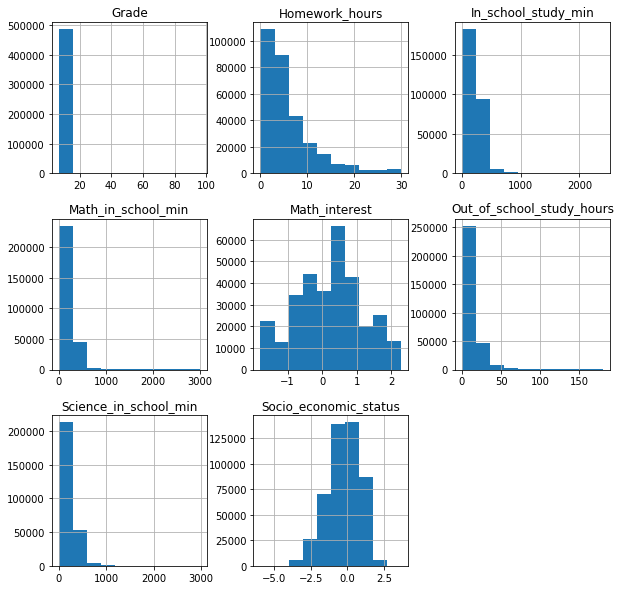

In [9]:
pisa[['Grade', 'Homework_hours','Socio_economic_status','Math_interest', 'In_school_study_min', 'Math_in_school_min', 'Out_of_school_study_hours', 'Science_in_school_min']].hist(figsize=(10,10));

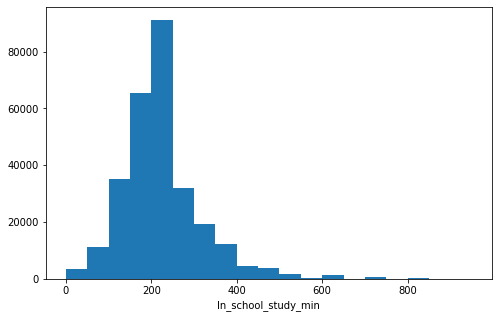

In [18]:
binsize = 50
bins = np.arange(0, 1000, binsize)
                 #pisa['In_school_study_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'In_school_study_min', bins = bins)
plt.xlabel('In_school_study_min')
plt.show()

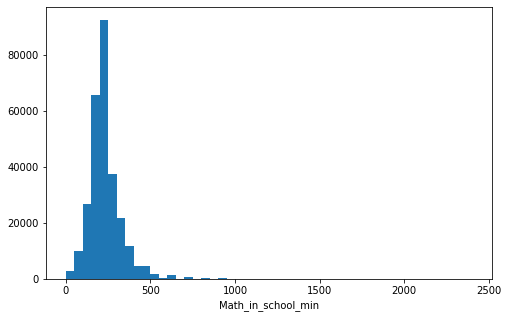

In [19]:
binsize = 50
bins = np.arange(0, #1000, binsize)
                 pisa['In_school_study_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Math_in_school_min', bins = bins)
plt.xlabel('Math_in_school_min')
plt.show()


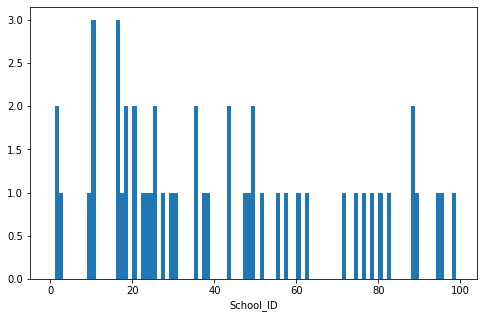

In [33]:
binsize = 1
bins = np.arange(0, 100, binsize)
                 #pisa['In_school_study_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Math_in_school_min > 1000 and School_ID<200'), x = 'School_ID', bins = bins)
plt.xlabel('School_ID')
plt.show()


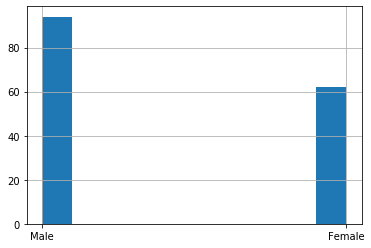

In [24]:
pisa.query('Math_in_school_min > 1000')['Gender'].hist()

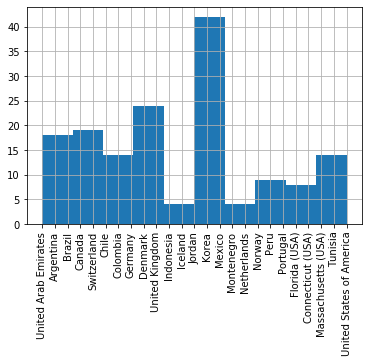

In [36]:
pisa.query('Math_in_school_min > 1000')['Country'].hist()
plt.xticks(rotation='vertical');

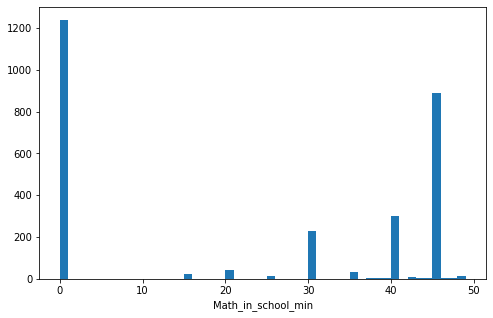

In [38]:
#how data spred ner zero 

binsize = 1
bins = np.arange(0, 50, binsize)
                 #pisa['In_school_study_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Math_in_school_min < 100'), x = 'Math_in_school_min', bins = bins)
plt.xlabel('Math_in_school_min')
plt.show()

In [39]:
pisa.Math_in_school_min.describe()

count    283303.000000
mean        226.007056
std          97.448421
min           0.000000
25%         180.000000
50%         220.000000
75%         250.000000
max        3000.000000
Name: Math_in_school_min, dtype: float64

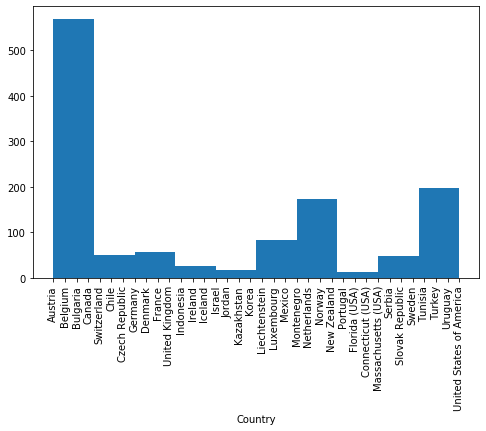

In [43]:
#what students have Math_in_school_min=0

plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Math_in_school_min ==0'), x = 'Country')
plt.xlabel('Country')
plt.xticks(rotation='vertical')
plt.show()

In [44]:
pisa.query('Country == "Austria"').shape

(4755, 17)

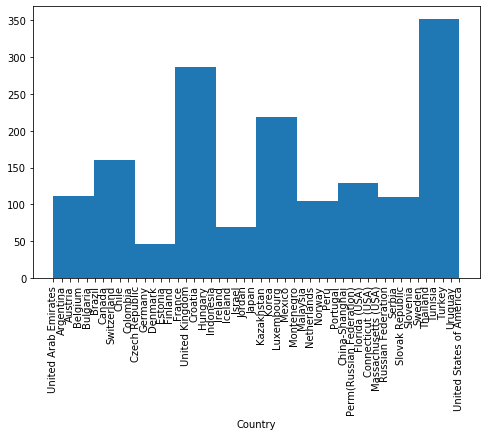

In [45]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa.query('Math_in_school_min > 0 and Math_in_school_min < 50' ), x = 'Country')
plt.xlabel('Country')
plt.xticks(rotation='vertical')
plt.show()

In [12]:
pisa[pisa['Math_interest'].isnull()]

,Country,School_ID,Grade,Gender,Enjoy_math,Homework_hours,Socio_economic_status,Immigration_status,Math_interest,Language_at_home,In_school_study_min,Math_in_school_min,Out_of_school_study_hours,Science_in_school_min,Math_score,Reading_score,Science_score
3,Albania,1,9,Female,NaN,10.0,NaN,Native,NaN,Albanian,135.0,135.0,17.0,90.0,412.2215,547.3630,438.6796
5,Albania,1,9,Female,NaN,3.0,NaN,Native,NaN,Albanian,NaN,NaN,26.0,NaN,396.3312,378.2544,384.3156
6,Albania,1,10,Female,NaN,3.0,NaN,Native,NaN,Albanian,135.0,225.0,10.0,90.0,438.0823,373.2503,508.1499
9,Albania,2,10,Female,NaN,NaN,NaN,Native,NaN,Albanian,240.0,90.0,23.0,270.0,463.6314,454.5082,404.2708
10,Albania,2,10,Female,NaN,NaN,NaN,Native,NaN,Albanian,225.0,180.0,10.0,90.0,403.8869,550.0637,438.0269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485478,Vietnam,162,10,Female,NaN,2.0,-2.06,Native,NaN,Vietnamese,NaN,315.0,5.0,450.0,439.7959,442.7524,485.2107
485479,Vietnam,162,10,Male,NaN,5.0,-0.53,Native,NaN,Vietnamese,225.0,315.0,10.0,NaN,426.4761,418.5971,473.1816
485481,Vietnam,162,10,Male,NaN,3.0,-1.26,Native,NaN,Vietnamese,225.0,270.0,18.0,450.0,387.2176,459.4161,473.4614
485483,Vietnam,162,10,Female,NaN,8.0,-0.50,Native,NaN,Vietnamese,225.0,NaN,26.0,315.0,526.1022,482.3090,533.4204


In [9]:
sb.countplot(data = pisa_usa, x = 'Grade', hue = 'Country');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'US states')

NameError: name 'pisa_usa' is not defined

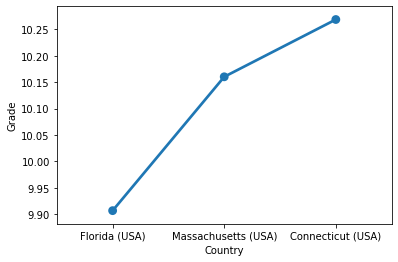

In [10]:
sb.pointplot(data = pisa_usa[['Country', 'Grade']].groupby('Country', as_index=False).mean().sort_values('Grade', ascending=True), x ='Country', y = 'Grade') ;

No handles with labels found to put in legend.


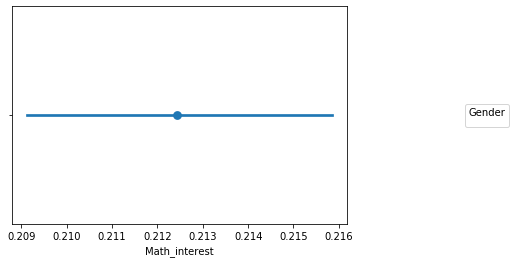

In [16]:
#Math interest by gender
sb.pointplot(data = pisa[['Math_interest', 'Gender']], x = 'Math_interest', hue = 'Gender');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'Gender')

In [10]:
sb.countplot(data = pisa0, x = 'ST20Q01')#, hue = 'Country');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'PROGN')
plt.xticks(rotation = 20)

NameError: name 'pisa0' is not defined

(array([0, 1]), <a list of 2 Text xticklabel objects>)

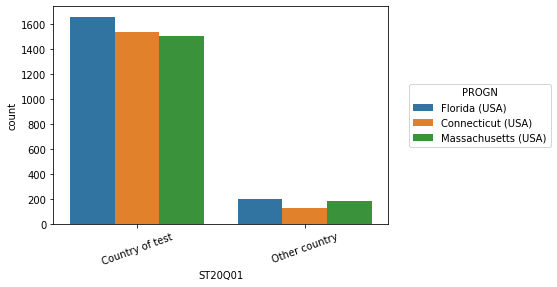

In [14]:
sb.countplot(data = pisa_usa, x = 'ST20Q01', hue = 'Country');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'PROGN')
plt.xticks(rotation = 20)

In [11]:
sb.countplot(data = pisa_usa, x = 'ST25Q01', hue = 'Country');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'PROGN')
plt.xticks(rotation = 20)

NameError: name 'pisa_usa' is not defined

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

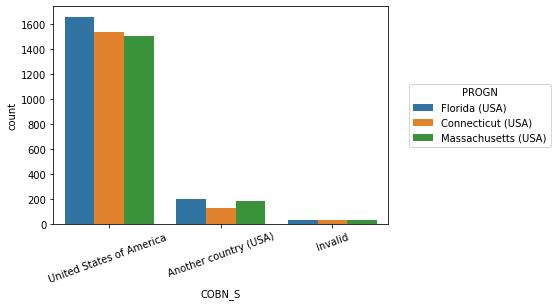

In [16]:
sb.countplot(data = pisa_usa, x = 'COBN_S', hue = 'Country');
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), title = 'PROGN')
plt.xticks(rotation = 20)

In [ ]:
"COGACT","Cognitive Activation in Mathematics Lessons"
"ESCS","Index of economic, social and cultural status"
"IMMIG","Immigration status"
"LANGN","Language at home (3-digit code)"
"ST29Q03","Math Interest - Look Forward to Lessons"
"ST29Q04","Math Interest - Enjoy Maths"
;"ST21Q01","Age of arrival in <country of test>" arrival age

Math Level Score points on the PISA scale
6 Above 669.3
5 From 607.0 to less than 669.3
4 From 544.7 to less than 607.0
3 From 482.4 to less than 544.7
2 From 420.1 to less than 482.4
1 From 357.8 to less than 420.1
Below level 1 Below 357.8

In [11]:
pisa.Enjoy_math.fillna("Unknown", inplace = True) 
pisa.Enjoy_math.unique()
pisa.Immigration_status.fillna("Unknown", inplace = True) 
pisa.Immigration_status.unique()

array(['Native', 'Unknown', 'Second-Generation', 'First-Generation'],
      dtype=object)

In [12]:
enjoy_order = ['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree', 'Unknown']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = enjoy_order)
pisa['Enjoy_math'] = pisa['Enjoy_math'].astype(ordered_cat)

imm_order = ['Native', 'First-Generation', 'Second-Generation', 'Unknown']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = imm_order)
pisa['Immigration_status'] = pisa['Immigration_status'].astype(ordered_cat)

### What is the structure of your dataset?

> There are 485490 students in the dataset from 68 different countries with these features I chose:
Country, School_ID, Grade, Gender, Enjoy_math, Homework_hours, Socio_economic_status, Immigration_status, Language_at_home, Math_score, Reading_score, Science_score        <br>
Some variables are categorical: Grade, Gender. Some are numeric: Homework_hours, Socio_economic_status, Math_score,      Reading_score, Science_score. Variables Enjoy_math, Immigration_status are ordered categorical variables with the following levels. <br>
Enjoy_math: 'Strongly disagree', 'Disagree', 'Agree', 'Strongly agree', 'Unknown' <br>
Immigration_status: 'Native', 'First-Generation', 'Second-Generation', 'Unknown' <br>

### What is/are the main feature(s) of interest in your dataset?

> I'm very interested in finding out what features are best for predicting the math, reading and science test results.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think Socio_economic_status of students will have a big effect on the scores, disadvantaged students will be underperforming. I also hope that if students enjoy subject and independent time studying (homework) they will perform better.<br>
It is interesting how immigrant status is influencing scores and if gender has influence at all.


## Univariate Exploration

> 1) distribution of the main variables: math, reading and science scores.

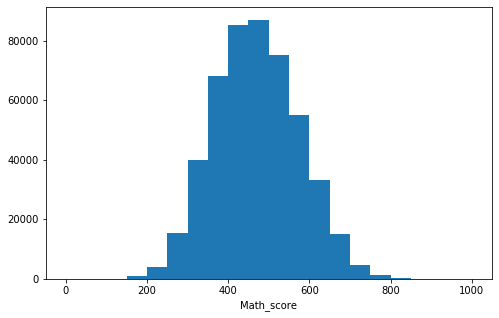

In [13]:
binsize = 50
bins = np.arange(0, pisa['Math_score'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Math_score', bins = bins)
plt.xlabel('Math_score')
plt.show()

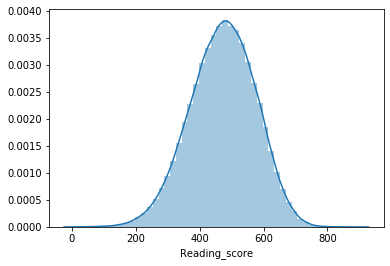

In [14]:
sb.distplot(pisa['Reading_score'], norm_hist=True, color = base_color);

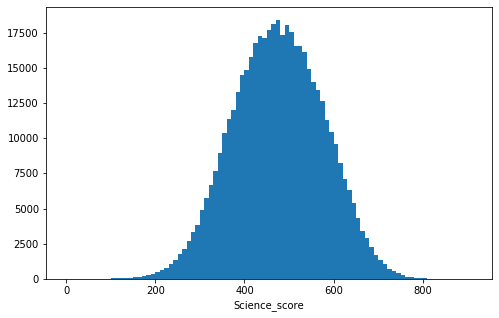

In [15]:
binsize = 10
bins = np.arange(0, pisa['Science_score'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Science_score', bins = bins)
plt.xlabel('Science_score')
plt.show()

All plots are normally distributed. I guess the PISA test is organized that way to get normally distributed scores as a result. 

>2) How are students distributed among the countries?

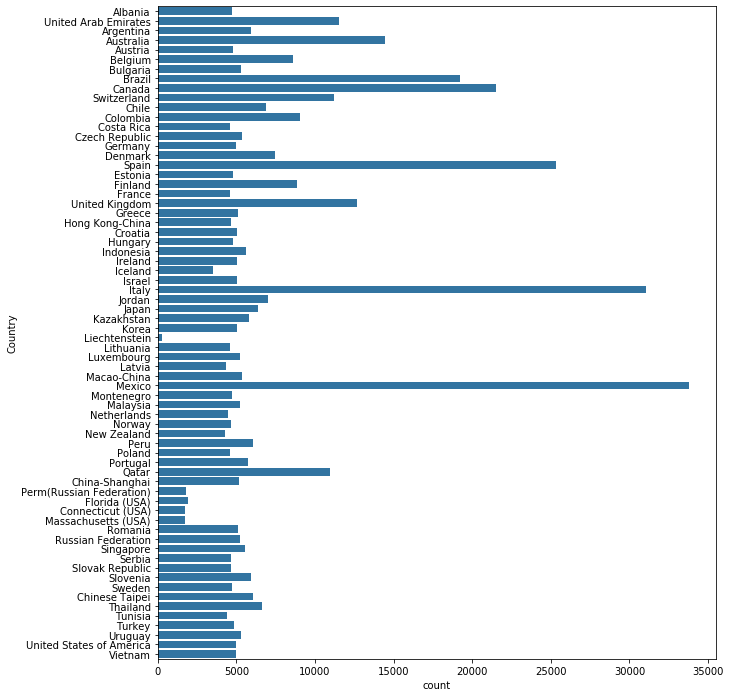

In [15]:
plt.figure(figsize = [10, 12])
sb.countplot(data=pisa, y = 'Country', color = base_color );

Most countries have arount 5000 students particiated or more. Countries with less studeant are actually subregions of other countries.
I think it would more intersting to choose two-three countries and investigate them more. Or may be choose different states of USA and compare them.

> 3) Next I want to investigate Socio_economic_status.<br>
Socio_economic_status is the PISA index of economic, social and cultural status (ESCS) created using student reports on parental occupation, the highest level of parental education, and an index of home possessions related to family wealth, home educational resources and possessions related to “classical” culture in the family home.<br>
A negative value merely indicates that the respondents answered less positively than all respondents did on average across OECD countries.

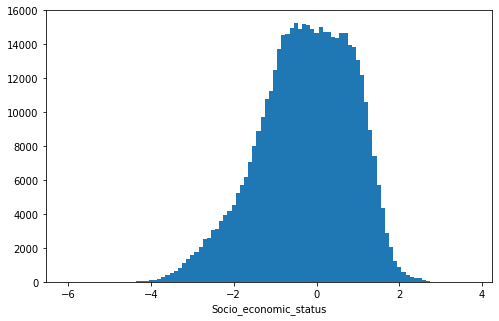

In [17]:
binsize = 0.1
bins = np.arange(pisa['Socio_economic_status'].min() - binsize, pisa['Socio_economic_status'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Socio_economic_status', bins = bins)#density=True)
plt.xlabel('Socio_economic_status')
plt.show()

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00171851, 0.00343702, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00859254, 0.00343702,
        0.01031105, 0.00859254, 0.02234061, 0.02405912, 0.02749613,
        0.04639973, 0.05155525, 0.06014779, 0.07045884, 0.08936243,
        0.13748067, 0.10482901, 0.14263619, 0.14779172, 0.18044338,
        0.18903592, 0.18731741, 0.21653205, 0.2474652 , 0.25605774,
        0.26636879, 0.2680873 , 0.32823509, 0.29902045, 0.30589448,
        0.31105001, 0.31964255, 0.32823509, 0.30589448, 0.34885719,
        0.2887094 , 0.30589448, 0.24402818, 0.29042791, 0.20965802,
        0.25777625, 0.23715415, 0.24574669, 0.26293178, 0.23887266,
        0.22168758, 0.25262073, 0.24402818, 0.25090222, 0.20793951,
        0.21137653, 0.20965802, 0.16153978, 0.08

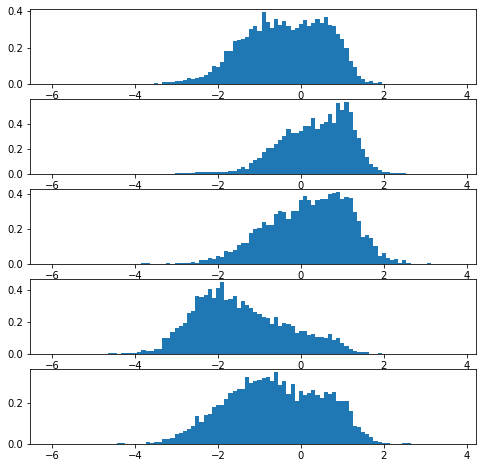

In [18]:
plt.figure(figsize = [8, 8]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(5, 1, 1)
plt.hist(data = pisa[pisa['Country'] == 'China-Shanghai'], x = 'Socio_economic_status', bins = bins,density=True)
plt.subplot(5, 1, 2)
plt.hist(data = pisa[pisa['Country'] == 'Finland'], x = 'Socio_economic_status', bins = bins,density=True)
plt.subplot(5, 1, 3)
plt.hist(data = pisa[pisa['Country'] == 'United States of America'], x = 'Socio_economic_status', bins = bins,density=True)
plt.subplot(5, 1, 4)
plt.hist(data = pisa[pisa['Country'] == 'Turkey'], x = 'Socio_economic_status', bins = bins,density=True)
plt.subplot(5, 1, 5)
plt.hist(data = pisa[pisa['Country'] == 'Argentina'], x = 'Socio_economic_status', bins = bins,density=True)

#plt.show();

In [ ]:
array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietnam'], dtype=object)

Socio_economic_status is slightly skewed left. I would like later to cut Socio_economic_status into quarter to be able to compare 

> 4) Grade distibution

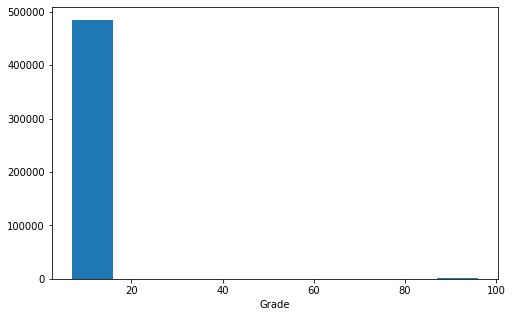

In [19]:
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Grade')
plt.xlabel('Grade')
plt.show()

As I noticed earlier there is an outlier. 

In [20]:
print(pisa[pisa['Grade']>14].Grade.value_counts())
#Percent of student body
100* pisa[pisa['Grade']>14].Country.value_counts()/pisa.Country.count()

96    873
Name: Grade, dtype: int64


Portugal     0.105666
Vietnam      0.038930
Belgium      0.023481
Lithuania    0.009269
Latvia       0.002472
Name: Country, dtype: float64

PISA-2012-technical-report-final.pdf file indicates that values for Grade column should be from 7 to 14. <br>
I think 96 means that the grade is unknown. In all countries such values are 0.1% or less.<br>
It would be safe to fill them with mean value.

In [21]:
pisa[((pisa['Grade']<=14) & ((pisa['Country']=='Lithuania')|(pisa['Country']=='Portugal')|(pisa['Country']=='Vietnam')|(pisa['Country']=='Belgium')|(pisa['Country']=='Latvia')))].groupby('Country')['Grade'].mean().round()

Country
Belgium      10.0
Latvia        9.0
Lithuania     9.0
Portugal      9.0
Vietnam      10.0
Name: Grade, dtype: float64

In [22]:
pisa.loc[((pisa['Country']=='Vietnam')|(pisa['Country']=='Belgium')) & (pisa.Grade == 96), ['Grade']] = 10
pisa.loc[((pisa['Country']=='Lithuania')|(pisa['Country']=='Portugal')|(pisa['Country']=='Latvia')) & (pisa.Grade == 96), ['Grade']] = 9

In [23]:
#Test
print(pisa[pisa['Grade']>20].shape)
pisa[pisa['Country']=='Lithuania'].Grade.value_counts()

(0, 12)


9     3806
10     525
8      278
7        7
11       2
Name: Grade, dtype: int64

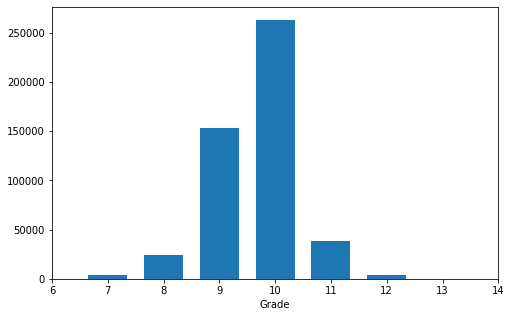

In [24]:
bin_edges = np.arange(6.5, 13.5, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Grade', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(6, 15, 1))
plt.xlabel('Grade')
plt.show()

Looks like most 15y.o. around all countries attend 10th grade.

> 5 Gender distribution 

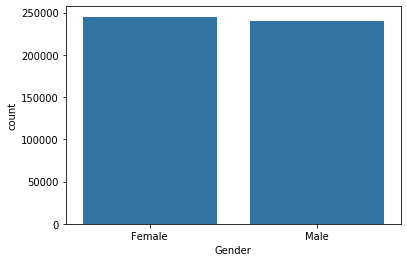

In [25]:
sb.countplot(data = pisa, x = 'Gender', color=base_color)

> 6) Enjoy_math attitude distribution <br>
7) Immigration_status distribution

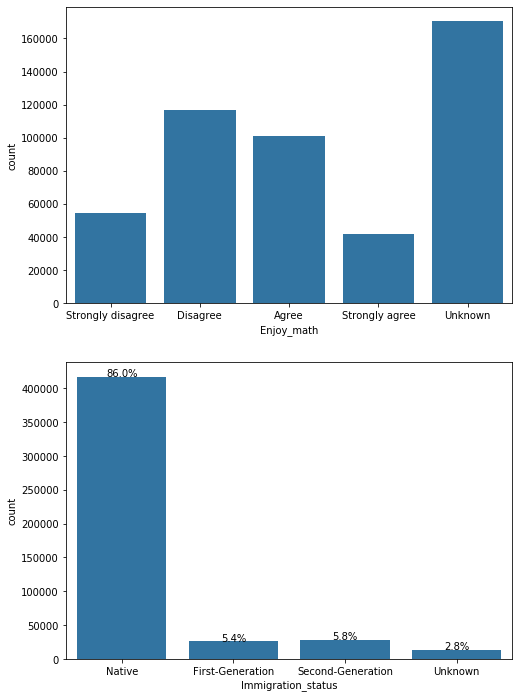

In [26]:
fig, ax = plt.subplots(nrows=2, figsize = [8,12]);
sb.countplot(data = pisa, x = 'Enjoy_math', color=base_color, ax = ax[0]);
sb.countplot(data = pisa, x = 'Immigration_status', color=base_color, ax = ax[1]);
n_points = pisa.shape[0]
cat_counts = pisa['Immigration_status'].value_counts()
locs, labels = plt.xticks() 
for loc, label in zip(locs, labels):    
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)    
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

plt.show();

I know that there are countries like the USA or Canada which have larger percentages of immigrant students, but overall 86% of the population are native students.<br>
<br>

There are too many students in the Unknown category in the Enjoy_math variable. How does this uncertainty spread by country?

In [27]:
pisa_unknown = pd.merge(pisa[pisa['Enjoy_math'] == 'Unknown'][['Country', 'Enjoy_math']].groupby(['Country']).count().reset_index(),  
                          pisa[['Country', 'Enjoy_math']].groupby(['Country']).count(), on=['Country'])
pisa_unknown['percent'] = 100*pisa_unknown['Enjoy_math_x']/pisa_unknown['Enjoy_math_y']                       

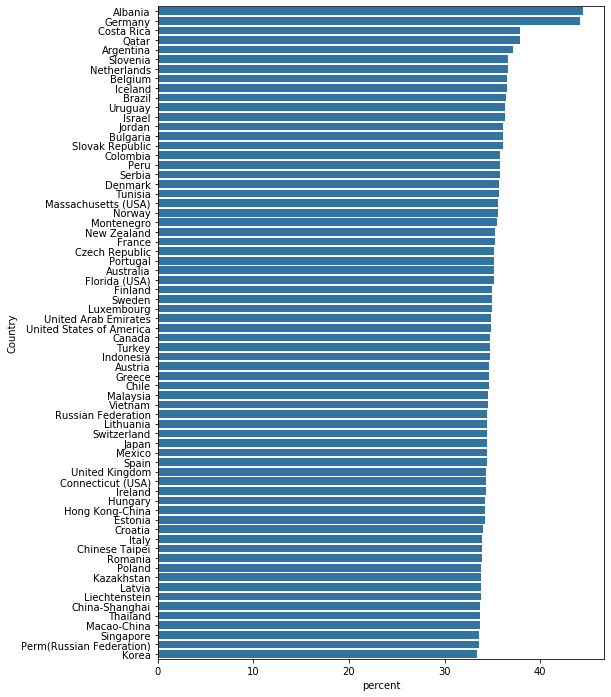

In [115]:
plt.figure(figsize=(8,12))
sb.barplot(data = pisa_unknown.sort_values('percent', ascending=False), y ='Country', x = 'percent', color=base_color) 

About a third or more students are in the Unknown category for each country.

> 8) Time spent on homework at home

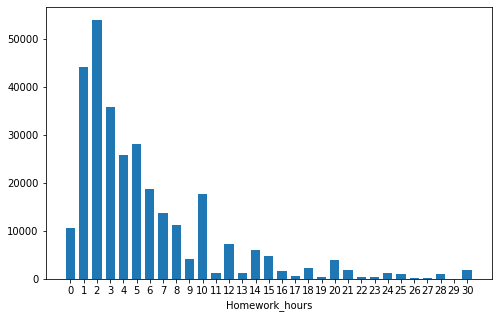

In [28]:
bin_edges = np.arange(-0.5, 31, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Homework_hours', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 31, 1))
plt.xlabel('Homework_hours')
plt.show()

In [29]:
pisa_unknown = pd.merge(pisa[pisa.Homework_hours.isnull()][['Country', 'Homework_hours']].fillna(0).groupby(['Country']).count().reset_index(),  
                          pisa[['Country', 'Homework_hours']].fillna(0).groupby(['Country']).count().reset_index(), on=['Country'])
pisa_unknown['percent'] = 100*pisa_unknown['Homework_hours_x']/pisa_unknown['Homework_hours_y']    

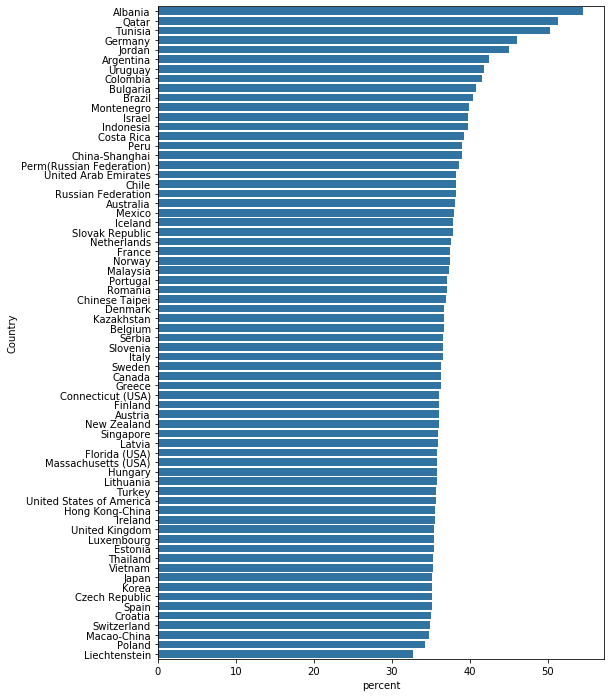

In [140]:
plt.figure(figsize=(8,12))
sb.barplot(data = pisa_unknown.sort_values('percent', ascending=False), y ='Country', x = 'percent', color=base_color) 

In [ ]:
pisa_unknown = pd.merge(pisa[pisa.Socio_economic_status.isnull()][['Country', 'Socio_economic_status']].fillna(0).groupby(['Country']).count().reset_index(),  
                          pisa[['Country', 'Socio_economic_status']].fillna(0).groupby(['Country']).count().reset_index(), on=['Country'])
pisa_unknown['percent'] = 100*pisa_unknown['Socio_economic_status_x']/pisa_unknown['Socio_economic_status_y']    


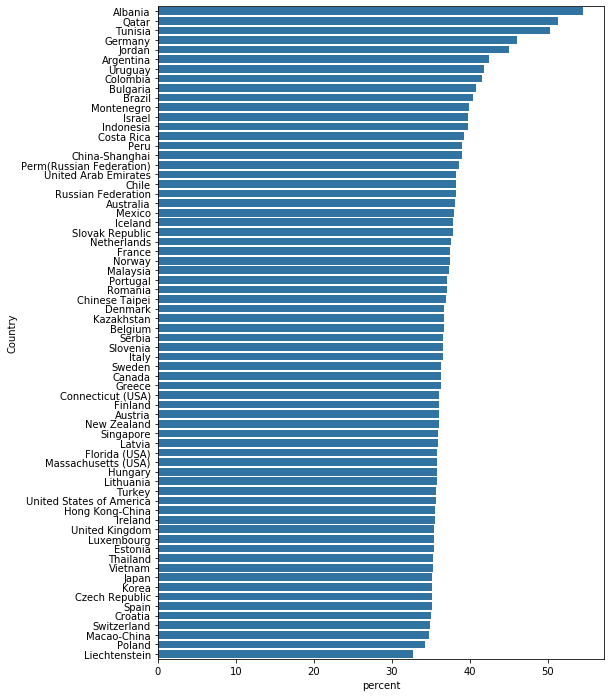

In [147]:
plt.figure(figsize=(8,12))
sb.barplot(data = pisa_unknown.sort_values('percent', ascending=False), y ='Country', x = 'percent', color=base_color) 

Most students spend on homework 10 hours a week or less.<br>
But there are some really hard working students. It's interesting if it would correlate in test scores.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All test scores are normally distributed. <br>
Most countries have arount 5000 students particiated or more. Countries with less studeant are actually subregions of other countries. I think it would more intersting to choose two-three countries and investigate them more. Or may be choose different states of USA and compare them.<br>
Socio_economic_status is slightly skewed left.<br>
86% of student are native students, it's interesting how this number would differ for USA and Canada.<br>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Grade variable had an outlier, some students were 96th grade. After investigation I learnt that this is an error or otherwise specially put number when grade was unknown. Such errors were 1% or less of all students in 5 different countries. I decided to substitute then with mean grade for the country.

## Bivariate Exploration

>                             'PV1MATH': 'Math_score', 
                            'PV1READ': 'Reading_score', 
                            'PV1SCIE': 'Science_score', 
                            'ST04Q01': 'Gender', 
                            'ST01Q01': 'Grade', 
                            'SCHOOLID': 'School_ID',
                            'IMMIG': 'Immigration_status',
                            'LANGN': 'Language_at_home',
                            'ESCS' : 'Socio_economic_status',
                            'ST29Q04': 'Enjoy_math',
                            'ST57Q01':'Homework_hours'})

In [30]:
numeric_features = ['Math_score', 'Reading_score', 'Science_score', 'Socio_economic_status', 'Homework_hours']


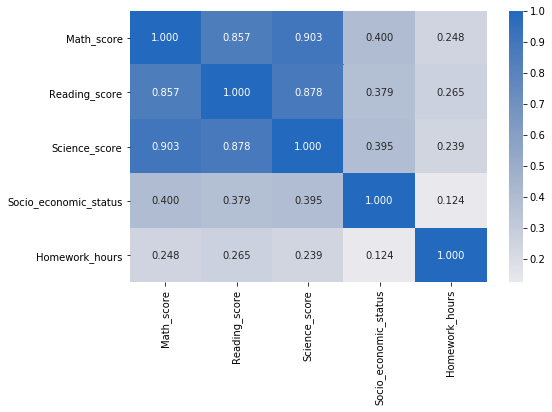

In [31]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[numeric_features].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

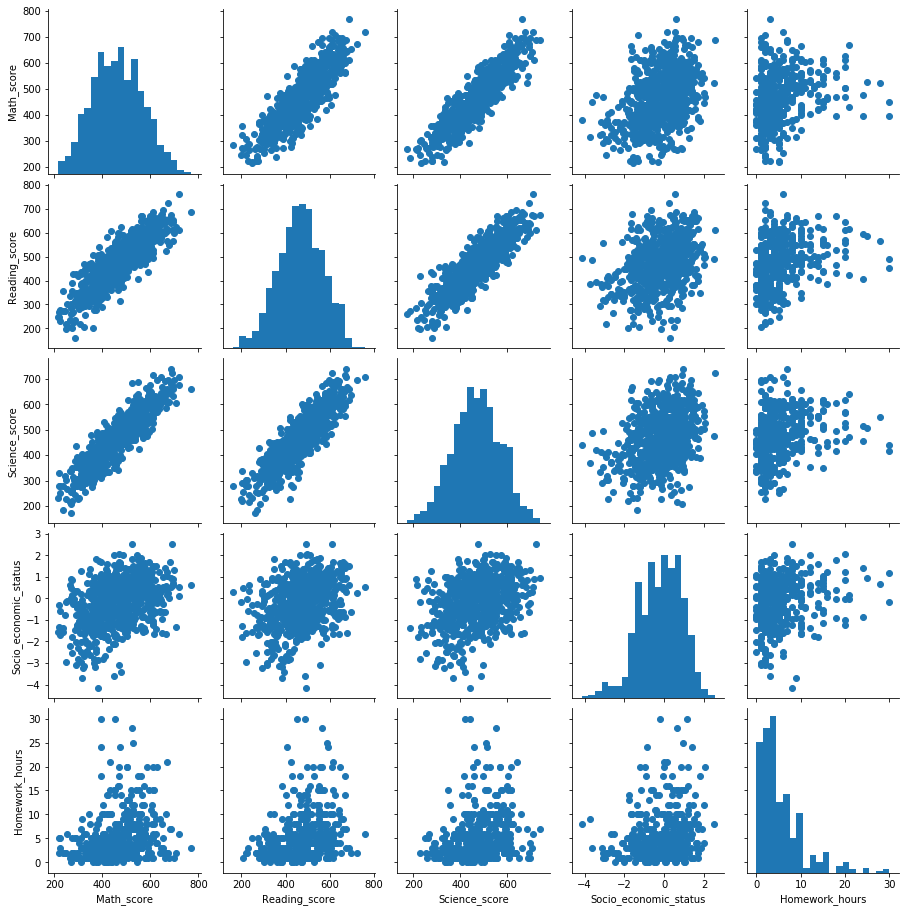

In [222]:
samples = np.random.choice(pisa.shape[0], 700, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = numeric_features)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

All three subject scores are highly correlated with one another, that tell us the students rarely choose only one subject and neglect others.<br>
Correlation between Social_economic status and test results is around 0.4. Students who have more economical, educational resources and support at home tend to get higher scores. <br>
Also we can see that disadvantaged students rarely almost never spend more than 10 hours a week on homework. And we can see this in the scores: students who got really bad scores spend less than 6 hours a week on homework. <br>

Now I want to see how test scores correlate with the categorical variables.

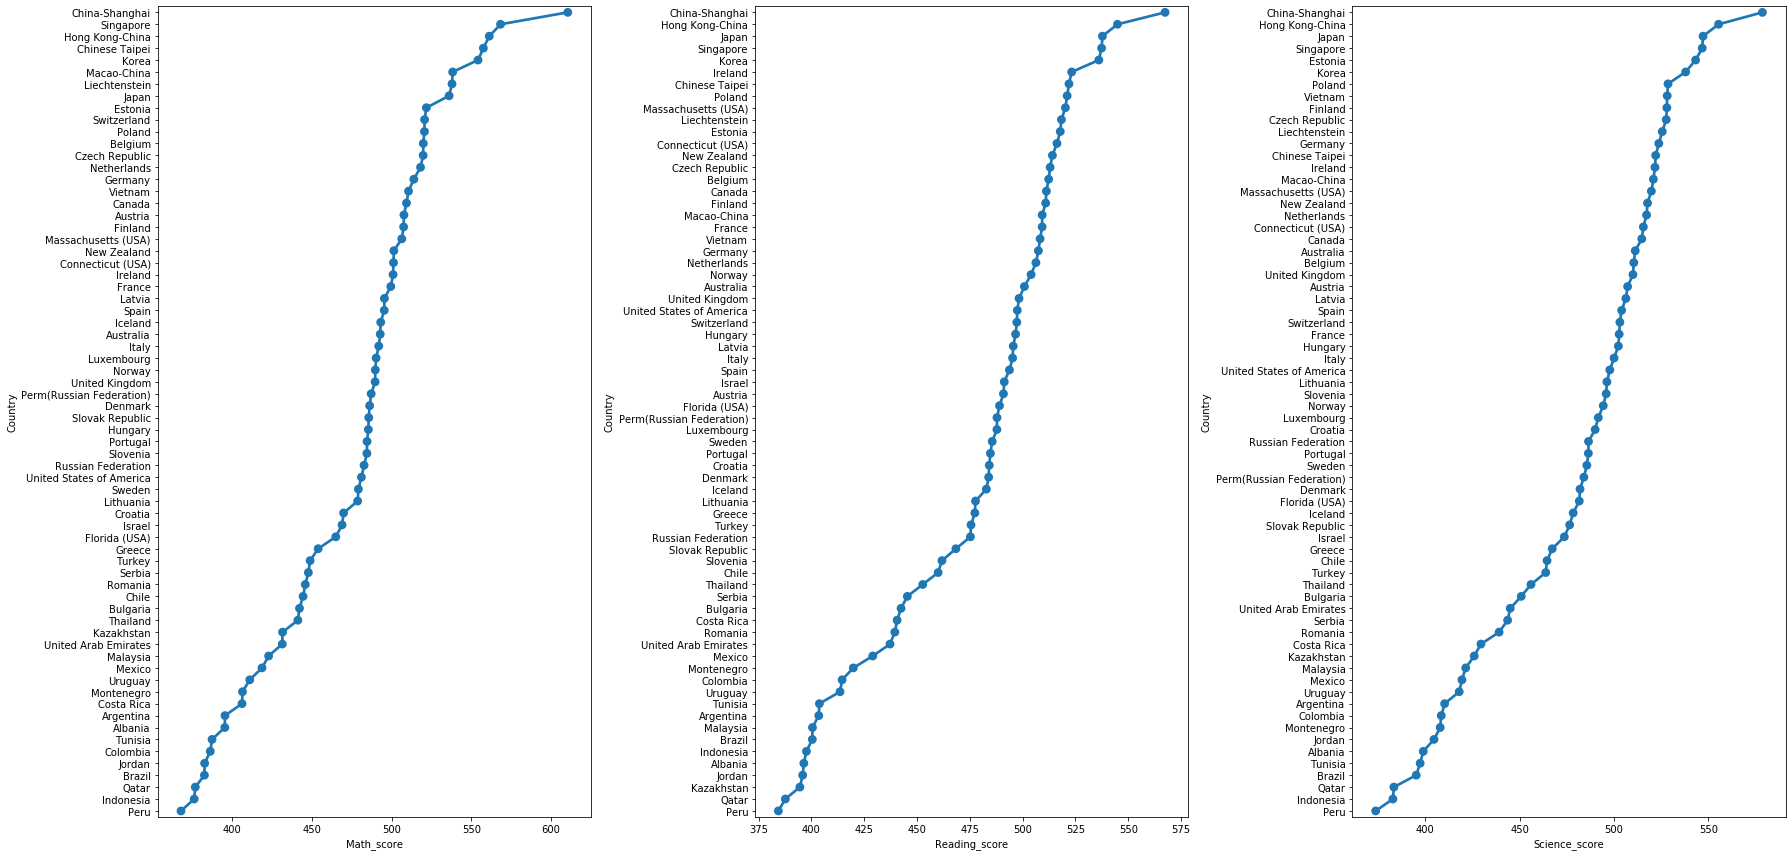

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,12))
plt.subplot(1, 3, 1)
sb.pointplot(data = pisa[['Country', 'Math_score']].groupby('Country', as_index=False).mean().sort_values('Math_score', ascending=False), y ='Country', x = 'Math_score') 
plt.subplot(1, 3, 2)
sb.pointplot(data = pisa[['Country', 'Reading_score']].groupby('Country', as_index=False).mean().sort_values('Reading_score', ascending=False), y ='Country', x = 'Reading_score') 
plt.subplot(1, 3, 3)
sb.pointplot(data = pisa[['Country', 'Science_score']].groupby('Country', as_index=False).mean().sort_values('Science_score', ascending=False), y ='Country', x = 'Science_score') 
fig.tight_layout()

East Asian countries: China, Korea, Japan have highest mean scores in all subjects. Canada outperform USA. Florida has the worst scores among three US states presented in all plots. 
Why Florida has performed worse than others? What differ it from other states?

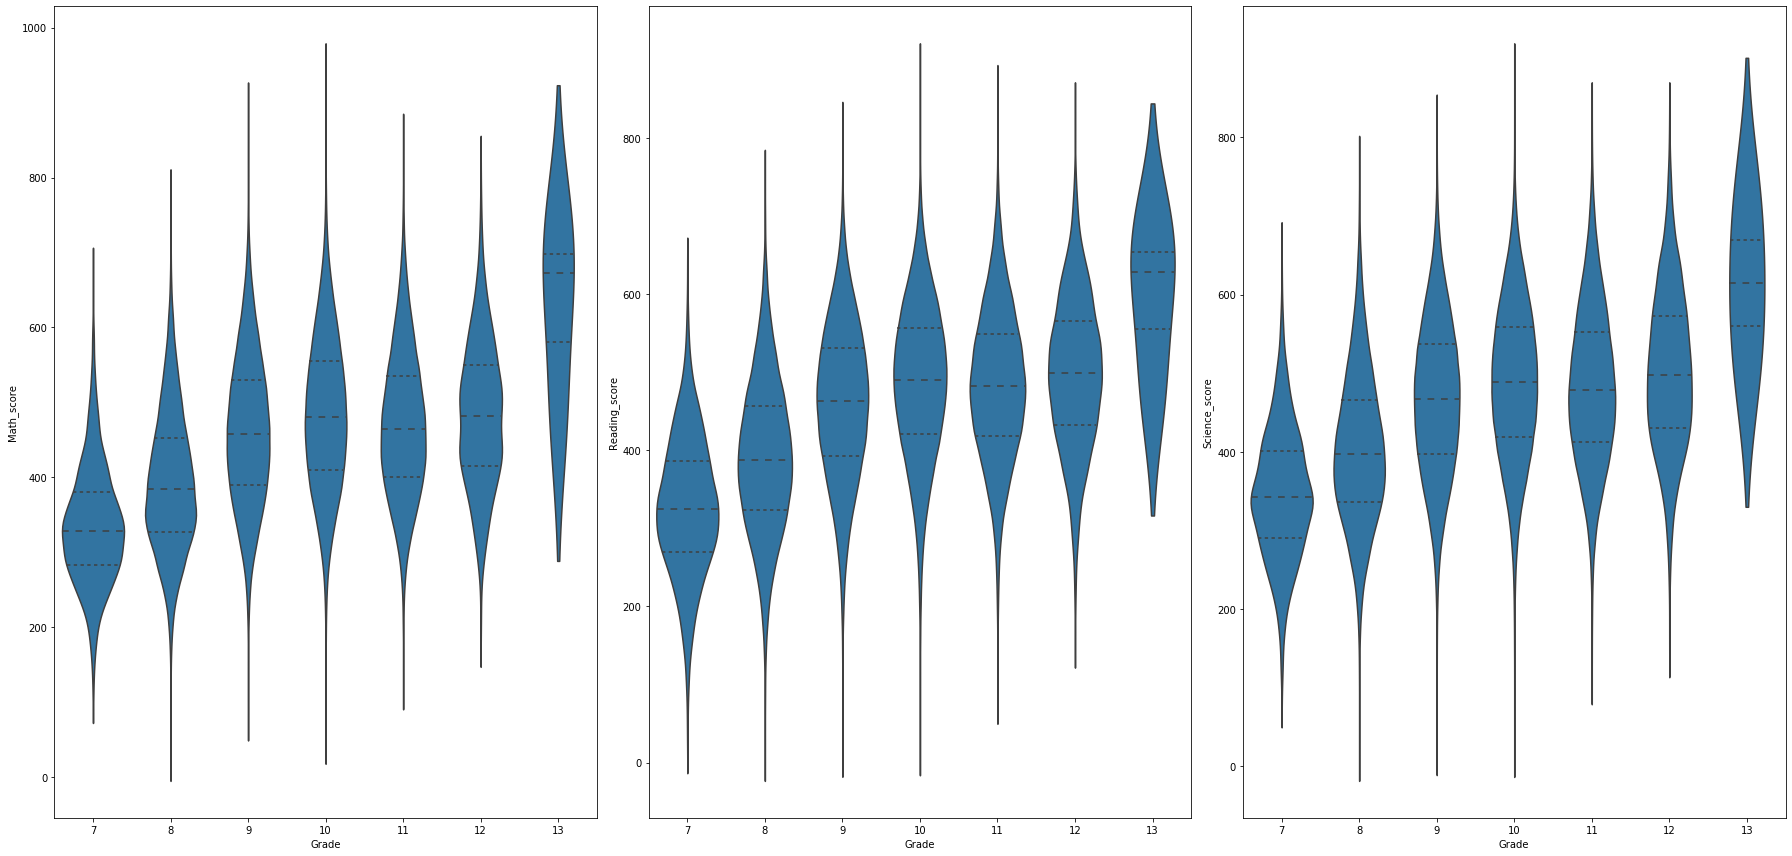

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,12))
plt.subplot(1, 3, 1)
sb.violinplot(data = pisa,x='Grade', y = 'Math_score', color = base_color, inner = 'quartile')
plt.subplot(1, 3, 2)
sb.violinplot(data = pisa,x='Grade', y = 'Reading_score', color = base_color, inner = 'quartile')
plt.subplot(1, 3, 3)
sb.violinplot(data = pisa,x='Grade', y = 'Science_score', color = base_color, inner = 'quartile')
fig.tight_layout()

Well, It's not surprising that the score increase with grade, but it is interesting that 10th graders outperform 11th graders.

(5316, 12)


NameError: name 'pisa_canada' is not defined

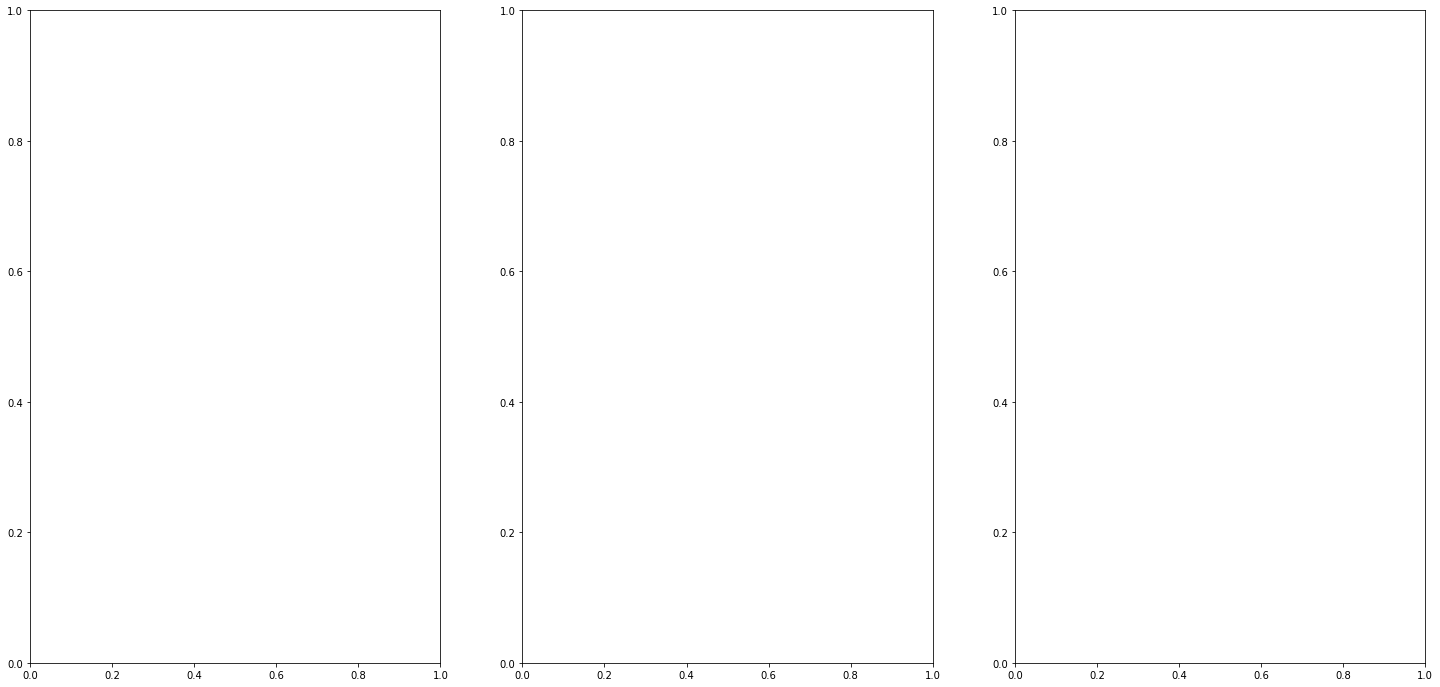

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,12))
plt.subplot(1, 3, 1)
sb.violinplot(data = pisa_canada,x='Immigration_status', y = 'Math_score', color = base_color, inner = 'quartile')
plt.subplot(1, 3, 2)
sb.violinplot(data = pisa_canada,x='Immigration_status', y = 'Reading_score', color = base_color, inner = 'quartile')
plt.subplot(1, 3, 3)
sb.violinplot(data = pisa_canada,x='Immigration_status', y = 'Science_score', color = base_color, inner = 'quartile')
fig.tight_layout()

In [ ]:
pisa_canada[pisa_canada['Immigration_status']=='Unknown'].sample(5)

In [ ]:
categoric_features = ['Country','Gender', 'Grade', 'Immigration_status', 'Enjoy_math']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


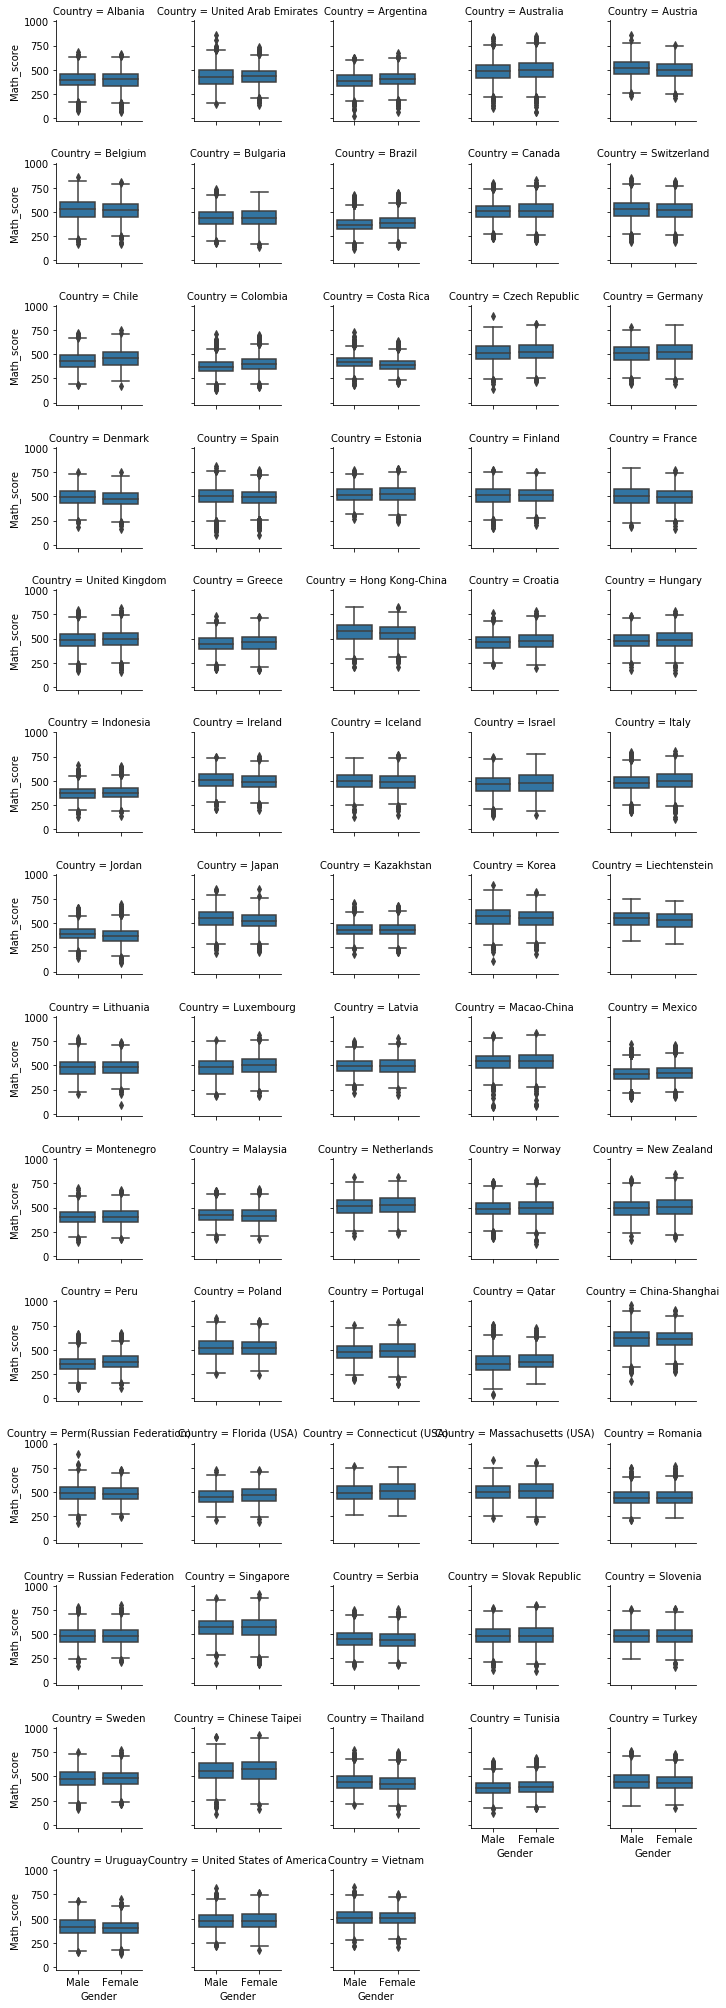

In [ ]:
sb.boxplot(data = pisa,x='Gender', y = 'Math_score', color = base_color)

In [ ]:
> Country vs homework hours

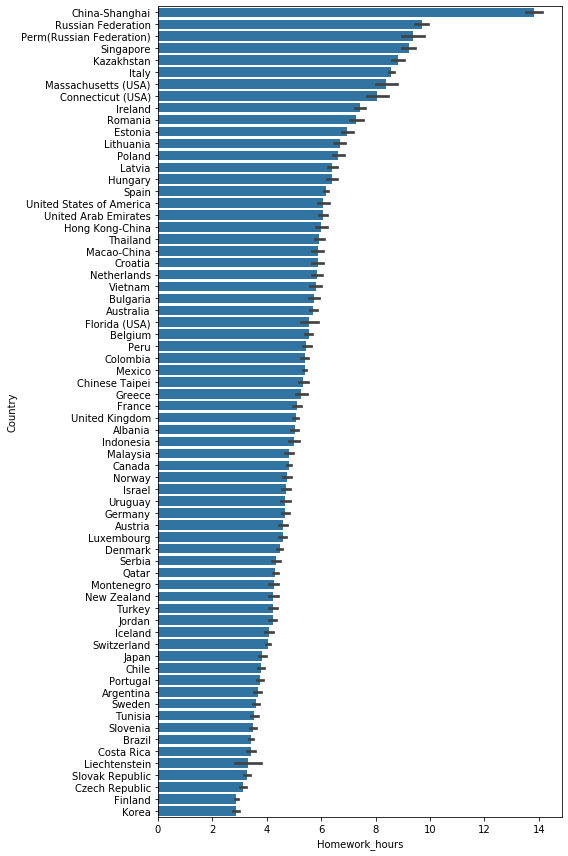

In [145]:
plt.figure(figsize=[8, 12])
grp_order = pisa.groupby('Country').Homework_hours.agg('mean').sort_values(ascending=False).index
sb.barplot(data = pisa.sort_values('Homework_hours', ascending=False), x = 'Homework_hours', y = 'Country', color = base_color, order=grp_order)
plt.tight_layout()

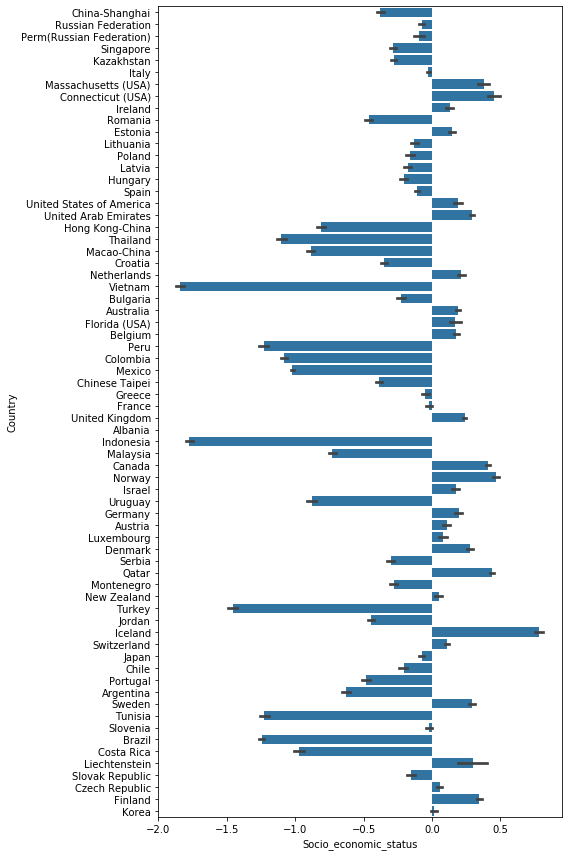

In [146]:
plt.figure(figsize=[8, 12])
grp_order = pisa.groupby('Country').Homework_hours.agg('mean').sort_values(ascending=False).index
sb.barplot(data = pisa.sort_values('Socio_economic_status', ascending=False), x = 'Socio_economic_status', y = 'Country', color = base_color, order=grp_order)
plt.tight_layout()

In [ ]:
bin_idxs = pd.cut(pisa['num_var'], 4, right = False, include_lowest = True,
                  labels = False).astype(int)
pts_per_bin = df.groupby(bin_idxs).size()

In [ ]:
pd.qcut(df['ext price'], q=4)

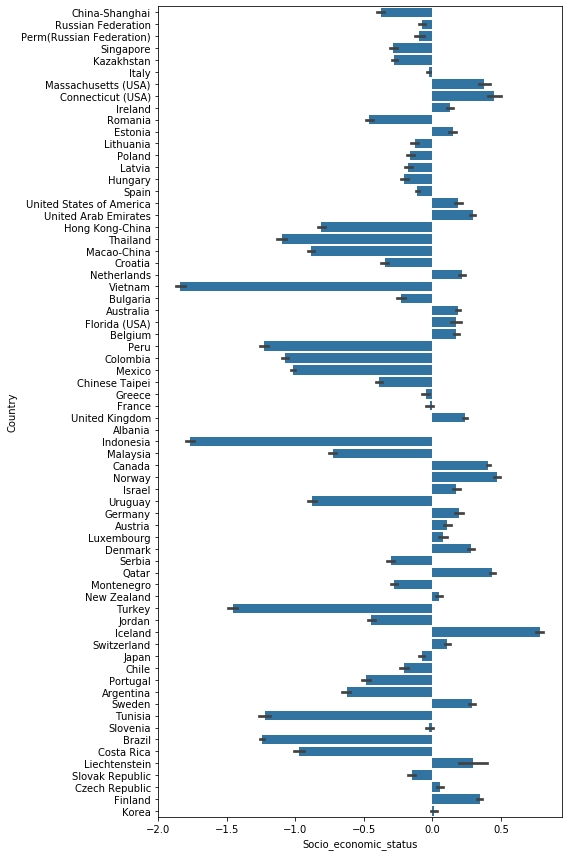

In [36]:
plt.figure(figsize=[8, 12])
grp_order = pisa.groupby('Country').Homework_hours.agg('mean').sort_values(ascending=False).index
sb.barplot(data = pisa.sort_values('Socio_economic_status', ascending=False), x = 'Socio_economic_status', y = 'Country', color = base_color, order=grp_order)
plt.tight_layout()

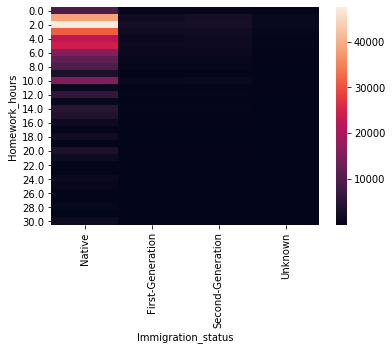

In [40]:
heat_counts = pisa.groupby(['Immigration_status', 'Homework_hours']).size()
heat_counts = heat_counts.reset_index(name='count')
heat_counts = heat_counts.pivot(index = 'Homework_hours', columns = 'Immigration_status', values = 'count')
sb.heatmap(heat_counts)

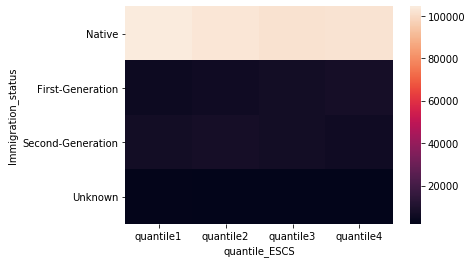

In [42]:
heat_counts = pisa.groupby(['Immigration_status', 'quantile_ESCS']).size()
heat_counts = heat_counts.reset_index(name='count')
heat_counts = heat_counts.pivot(index = 'Immigration_status', columns = 'quantile_ESCS', values = 'count')
sb.heatmap(heat_counts)

In [38]:
#xbin_edges = np.arange(-6, pisa['Socio_economic_status'].max()+0.5, 2.5)
#ybin_edges = np.arange(7,    df['num_var2'].max()+0.5, 0.5)
pisa['quantile_ESCS']=pd.qcut(pisa['Socio_economic_status'], 4, labels = ['quantile1','quantile2','quantile3','quantile4'])
#.astype(int)
#pd.qcut(pisa['Socio_economic_status'], q=4)

In [39]:
pisa.groupby(['Country','quantile_ESCS']).count()

School_ID   Grade  Gender  Enjoy_math  \
Country   quantile_ESCS                                          
Albania   quantile1            NaN     NaN     NaN         NaN   
          quantile2            NaN     NaN     NaN         NaN   
          quantile3            NaN     NaN     NaN         NaN   
          quantile4            NaN     NaN     NaN         NaN   
Argentina quantile1         2276.0  2276.0  2276.0      2276.0   
...                            ...     ...     ...         ...   
Uruguay   quantile4          684.0   684.0   684.0       684.0   
Vietnam   quantile1         3986.0  3986.0  3986.0      3986.0   
          quantile2          494.0   494.0   494.0       494.0   
          quantile3          302.0   302.0   302.0       302.0   
          quantile4          177.0   177.0   177.0       177.0   

                         Homework_hours  Socio_economic_status  \
Country   quantile_ESCS                                          
Albania   quantile1                 NaN                    NaN   
          quantile2                 NaN                    NaN   
          quantile3                 NaN                    NaN   
          quantile4                 NaN                    NaN   
Argentina quantile1              1260.0                 2276.0   
...                                 ...                    ...   
Uruguay   quantile4               429.0                  684.0   
Vietnam   quantile1              2579.0                 3986.0   
          quantile2               321.0                  494.0   
          quantile3               195.0                  302.0   
          quantile4               117.0                  177.0   

                         Immigration_status  Language_at_home  Math_score  \
Country   quantile_ESCS                                                     
Albania   quantile1                     NaN               NaN         NaN   
          quantile2                     NaN               NaN         NaN   
          quantile3                     NaN               NaN         NaN   
          quantile4                     NaN               NaN         NaN   
Argentina quantile1                  2276.0            2276.0      2276.0   
...                                     ...               ...         ...   
Uruguay   quantile4                   684.0             684.0       684.0   
Vietnam   quantile1                  3986.0            3986.0      3986.0   
          quantile2                   494.0             494.0       494.0   
          quantile3                   302.0             302.0       302.0   
          quantile4                   177.0             177.0       177.0   

                         Reading_score  Science_score  
Country   quantile_ESCS                                
Albania   quantile1                NaN            NaN  
          quantile2                NaN            NaN  
          quantile3                NaN            NaN  
          quantile4                NaN            NaN  
Argentina quantile1             2276.0         2276.0  
...                                ...            ...  
Uruguay   quantile4              684.0          684.0  
Vietnam   quantile1             3986.0         3986.0  
          quantile2              494.0          494.0  
          quantile3              302.0          302.0  
          quantile4              177.0          177.0  

[272 rows x 11 columns]

In [43]:
#Let's filter USA tates 
pisa_usa = pisa[((pisa.Country == 'Florida (USA)') | (pisa.Country == 'Connecticut (USA)') | (pisa.Country == 'Massachusetts (USA)'))]
#pisa[pisa.CNT == 'United States of America']
print(pisa_usa.shape)
pisa_canada = pisa[pisa.Country == 'Canada']
#pisa[pisa.CNT == 'United States of America']
print(pisa_canada.shape)


(5316, 13)
(21544, 13)


In [44]:
pisa.Socio_economic_status.min()

-5.95

In [ ]:
   'PV1MATH': 'Math_score', 
                            'PV1READ': 'Reading_score', 
                            'PV1SCIE': 'Science_score', 
                            'ST04Q01': 'Gender', 
                            'ST01Q01': 'Grade', 
                            'SCHOOLID': 'School_ID',
                            'IMMIG': 'Immigration_status',
                            'LANGN': 'Language_at_home',
                            'ESCS' : 'Socio_economic_status',
                            'ST29Q04': 'Enjoy_math',
                            'ST57Q01':'Homework_hours'})

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
g = sb.FacetGrid(data = pisa, col = 'Country', col_wrap = 5, size = 2)
g.map(sb.boxplot,'Gender', 'Math_score', color = base_color)

In [ ]:
plt.figure(figsize=[8, 12])
grp_order = pisa.groupby('Country').Homework_hours.agg('mean').sort_values(ascending=False).index
sb.barplot(data = pisa.sort_values('Homework_hours', ascending=False), x = 'Homework_hours', y = 'Country', color = base_color, order=grp_order, )
plt.tight_layout()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

## References

https://pandas.pydata.org/pandas-docs/version/0.23.1/generated/pandas.read_csv.html <br>
https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf <br>
https://www.oecd.org/pisa/pisaproducts/PISA12_stu_codebook.pdf<br>
https://stackoverflow.com/questions/41659188/how-to-adjust-subplot-size-in-seaborn <br>
